# importing the libraries

In [3]:
import pandas as pd
import numpy as np

In [4]:
#load the data
heart=pd.read_csv('heart.csv')

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


# data cleaning steps

In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [7]:
heart.shape

(303, 14)

In [8]:
#find the null values and fill them with mean or median
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#one hot coding should be done 
THAL={'fixed':1,'normal':2,'reversible':3}

In [10]:
#mapping has done
heart['thal']  = heart['thal'].map(THAL)

In [11]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,2.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,3.0,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,2.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,2.0,0


In [12]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
target      0
dtype: int64

In [13]:
#null values has been replaced by mean
heart.thal.mean()

2.3222591362126246

In [14]:
heart.thal.fillna(heart.thal.mean(),inplace=True)

In [15]:
heart[heart.thal.isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


# split the data into x and y and test and train

In [16]:
x=heart.drop('target',axis=1)
y=heart['target']

In [17]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [20]:
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


In [21]:
#import the sklearn and build decision tree
from sklearn import tree
from sklearn import metrics

ctree=tree.DecisionTreeClassifier()
ctree
ctree.fit(x_train,y_train)
y_test_pred=ctree.predict(x_test)
metrics.accuracy_score(y_test,y_test_pred)

0.6813186813186813

In [22]:
#tuning the model using gridsearch
from sklearn.model_selection import GridSearchCV

In [23]:
#tuning parametres
param_grid = { "criterion"      : ['gini', 'entropy'],    
               "max_features"   : [1, 12 ],             
               "splitter"       : ['best', 'random'],  
               "min_samples_leaf" : [33, 46],
               "max_depth"        : [16,22,31,43,52]
                }

In [24]:
optimized_tree = GridSearchCV(ctree, param_grid, scoring = 'accuracy', verbose=2, cv=5) 

In [25]:
#fit xtrain and ytrain
optimized_tree.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best 
[CV]  criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best 
[CV]  criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best 
[CV]  criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best 
[CV]  criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best 
[CV]  criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best, total= 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=gini, max_depth=16, max_features=12, min_samples_leaf=33, splitter=random 
[CV]  criterion=gini, max_depth=16, max_features=12, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=12, min_samples_leaf=33, splitter=random 
[CV]  criterion=gini, max_depth=16, max_features=12, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=12, min_samples_leaf=46, splitter=best 
[CV]  criterion=gini, max_depth=16, max_features=12, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=12, min_samples_leaf=46, splitter=best 
[CV]  criterion=gini, max_depth=16, max_features=12, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=12, min_samples_leaf=46, splitter=best 
[CV]  criterion=gini, max_depth=16, max_features=12, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=16, m

[CV]  criterion=gini, max_depth=31, max_features=1, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=31, max_features=1, min_samples_leaf=33, splitter=random 
[CV]  criterion=gini, max_depth=31, max_features=1, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=31, max_features=1, min_samples_leaf=46, splitter=best 
[CV]  criterion=gini, max_depth=31, max_features=1, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=31, max_features=1, min_samples_leaf=46, splitter=best 
[CV]  criterion=gini, max_depth=31, max_features=1, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=31, max_features=1, min_samples_leaf=46, splitter=best 
[CV]  criterion=gini, max_depth=31, max_features=1, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=31, max_features=1, min_samples_leaf=46, splitter=best 
[CV]  criterion=gini, max_depth=31, max_features=

[CV]  criterion=gini, max_depth=43, max_features=12, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=43, max_features=12, min_samples_leaf=33, splitter=random 
[CV]  criterion=gini, max_depth=43, max_features=12, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=43, max_features=12, min_samples_leaf=33, splitter=random 
[CV]  criterion=gini, max_depth=43, max_features=12, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=43, max_features=12, min_samples_leaf=33, splitter=random 
[CV]  criterion=gini, max_depth=43, max_features=12, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=43, max_features=12, min_samples_leaf=33, splitter=random 
[CV]  criterion=gini, max_depth=43, max_features=12, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=43, max_features=12, min_samples_leaf=46, splitter=best 
[CV]  criterion=gini, max_d

[CV]  criterion=entropy, max_depth=16, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=16, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=entropy, max_depth=16, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=16, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=entropy, max_depth=16, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=16, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=entropy, max_depth=16, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=16, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=entropy, max_depth=16, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=16, max_features=12, min_samples_leaf=33, splitter=best 
[CV]  

[CV]  criterion=entropy, max_depth=22, max_features=12, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=22, max_features=12, min_samples_leaf=46, splitter=best 
[CV]  criterion=entropy, max_depth=22, max_features=12, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=22, max_features=12, min_samples_leaf=46, splitter=best 
[CV]  criterion=entropy, max_depth=22, max_features=12, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=22, max_features=12, min_samples_leaf=46, splitter=best 
[CV]  criterion=entropy, max_depth=22, max_features=12, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=22, max_features=12, min_samples_leaf=46, splitter=random 
[CV]  criterion=entropy, max_depth=22, max_features=12, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=22, max_features=12, min_samples_leaf=46, splitter=random 
[CV]  cri

[CV]  criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  c

[CV]  criterion=entropy, max_depth=52, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=52, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=entropy, max_depth=52, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=52, max_features=12, min_samples_leaf=33, splitter=best 
[CV]  criterion=entropy, max_depth=52, max_features=12, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=52, max_features=12, min_samples_leaf=33, splitter=best 
[CV]  criterion=entropy, max_depth=52, max_features=12, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=52, max_features=12, min_samples_leaf=33, splitter=best 
[CV]  criterion=entropy, max_depth=52, max_features=12, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=52, max_features=12, min_samples_leaf=33, splitter=best 
[CV]  criter

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.5s finished
C:\Users\bunny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': [1, 12], 'splitter': ['best', 'random'], 'min_samples_leaf': [33, 46], 'max_depth': [16, 22, 31, 43, 52]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [26]:
#best parametres evolved
optimized_tree.best_params_

{'criterion': 'gini',
 'max_depth': 43,
 'max_features': 12,
 'min_samples_leaf': 33,
 'splitter': 'random'}

In [27]:
#best score after tuning 
optimized_tree.best_score_

0.7924528301886793

In [28]:
final_model = optimized_tree.best_estimator_

In [29]:
y_test_pred = final_model.predict(x_test)

In [30]:
metrics.accuracy_score(y_test, y_test_pred)

0.7802197802197802

In [31]:
ypred=optimized_tree.predict(x_test)

In [32]:
#accuracy of the model
metrics.accuracy_score(y_test,ypred)

0.7802197802197802

# feature importance

In [33]:
ctree.feature_importances_

array([0.07148722, 0.        , 0.1003264 , 0.09250954, 0.02095212,
       0.02288721, 0.01780116, 0.16158798, 0.        , 0.26068928,
       0.        , 0.16633051, 0.08542858])

In [34]:
comp_df = pd.DataFrame()
comp_df['cols'] = x.columns
comp_df['imp'] = ctree.feature_importances_*100

comp_df

,cols,imp
0,age,7.148722
1,sex,0.000000
2,cp,10.032640
3,trestbps,9.250954
4,chol,2.095212
5,fbs,2.288721
6,restecg,1.780116
7,thalach,16.158798
8,exang,0.000000
9,oldpeak,26.068928


In [35]:
#important attribute as per feature selection
comp_df.sort_values('imp',ascending=False)

,cols,imp
9,oldpeak,26.068928
11,ca,16.633051
7,thalach,16.158798
2,cp,10.032640
3,trestbps,9.250954
12,thal,8.542858
0,age,7.148722
5,fbs,2.288721
4,chol,2.095212
6,restecg,1.780116


In [36]:
#take x as important attributes and y as target variable repeat same process again
x=heart[['oldpeak','thalach','ca','chol','cp','thal']]
y=heart['target']

In [37]:
x.head()

,oldpeak,thalach,ca,chol,cp,thal
0,2.3,150,0,233,1,1.0
1,1.5,108,3,286,4,2.0
2,2.6,129,2,229,4,3.0
3,3.5,187,0,250,3,2.0
4,1.4,172,0,204,2,2.0


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [40]:
from sklearn import tree
from sklearn import metrics

ctree=tree.DecisionTreeClassifier()
ctree
ctree.fit(x_train,y_train)
y_test_pred=ctree.predict(x_test)
metrics.accuracy_score(y_test,y_test_pred)

0.8021978021978022

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = { "criterion"      : ['gini', 'entropy'],    
               "max_features"   : [1, 5 ],             
               "splitter"       : ['best', 'random'],  
               "min_samples_leaf" : [33, 46],
               "max_depth"        : [16,22,31,43,52],
              
                }

In [43]:
optimized_tree = GridSearchCV(ctree, param_grid, scoring = 'accuracy', verbose=2, cv=5) 

In [44]:
optimized_tree.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best 
[CV]  criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best 
[CV]  criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best 
[CV]  criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best 
[CV]  criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best 
[CV]  criterion=gini, max_depth=16, max_features=1, min_samples_leaf=33, splitter=best, total= 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=gini, max_depth=16, max_features=5, min_samples_leaf=33, splitter=random 
[CV]  criterion=gini, max_depth=16, max_features=5, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=5, min_samples_leaf=33, splitter=random 
[CV]  criterion=gini, max_depth=16, max_features=5, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=5, min_samples_leaf=33, splitter=random 
[CV]  criterion=gini, max_depth=16, max_features=5, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=5, min_samples_leaf=46, splitter=best 
[CV]  criterion=gini, max_depth=16, max_features=5, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=16, max_features=5, min_samples_leaf=46, splitter=best 
[CV]  criterion=gini, max_depth=16, max_features=5, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=16, max_fea

[CV]  criterion=gini, max_depth=31, max_features=1, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=31, max_features=1, min_samples_leaf=33, splitter=best 
[CV]  criterion=gini, max_depth=31, max_features=1, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=31, max_features=1, min_samples_leaf=33, splitter=best 
[CV]  criterion=gini, max_depth=31, max_features=1, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=31, max_features=1, min_samples_leaf=33, splitter=best 
[CV]  criterion=gini, max_depth=31, max_features=1, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=31, max_features=1, min_samples_leaf=33, splitter=random 
[CV]  criterion=gini, max_depth=31, max_features=1, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=31, max_features=1, min_samples_leaf=33, splitter=random 
[CV]  criterion=gini, max_depth=31, max_features=

[CV]  criterion=gini, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=gini, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=gini, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=gini, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=gini, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=43, max_features=5, min_samples_leaf=33, splitter=best 
[CV]  criterion=gini, max_depth=43, m

[CV]  criterion=gini, max_depth=52, max_features=5, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=52, max_features=5, min_samples_leaf=33, splitter=random 
[CV]  criterion=gini, max_depth=52, max_features=5, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=52, max_features=5, min_samples_leaf=46, splitter=best 
[CV]  criterion=gini, max_depth=52, max_features=5, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=52, max_features=5, min_samples_leaf=46, splitter=best 
[CV]  criterion=gini, max_depth=52, max_features=5, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=52, max_features=5, min_samples_leaf=46, splitter=best 
[CV]  criterion=gini, max_depth=52, max_features=5, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=52, max_features=5, min_samples_leaf=46, splitter=best 
[CV]  criterion=gini, max_depth=52, max_features=

[CV]  criterion=entropy, max_depth=16, max_features=5, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=16, max_features=5, min_samples_leaf=46, splitter=best 
[CV]  criterion=entropy, max_depth=16, max_features=5, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=16, max_features=5, min_samples_leaf=46, splitter=best 
[CV]  criterion=entropy, max_depth=16, max_features=5, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=16, max_features=5, min_samples_leaf=46, splitter=random 
[CV]  criterion=entropy, max_depth=16, max_features=5, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=16, max_features=5, min_samples_leaf=46, splitter=random 
[CV]  criterion=entropy, max_depth=16, max_features=5, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=16, max_features=5, min_samples_leaf=46, splitter=random 
[CV]  criterion

[CV]  criterion=entropy, max_depth=31, max_features=1, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=31, max_features=1, min_samples_leaf=33, splitter=random 
[CV]  criterion=entropy, max_depth=31, max_features=1, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=31, max_features=1, min_samples_leaf=33, splitter=random 
[CV]  criterion=entropy, max_depth=31, max_features=1, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=31, max_features=1, min_samples_leaf=33, splitter=random 
[CV]  criterion=entropy, max_depth=31, max_features=1, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=31, max_features=1, min_samples_leaf=46, splitter=best 
[CV]  criterion=entropy, max_depth=31, max_features=1, min_samples_leaf=46, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=31, max_features=1, min_samples_leaf=46, splitter=best 
[CV]  crite

[CV]  criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random 
[CV]  criterion=entropy, max_depth=43, max_features=1, min_samples_leaf=46, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=43, max_features=5, min_samples_leaf=33, splitter=best 
[CV]  criterion=entropy, max_depth=43, max_features=5, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=43, max_features=5, min_samples_leaf=33, splitter=best 
[CV]  crite

[CV]  criterion=entropy, max_depth=52, max_features=5, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=52, max_features=5, min_samples_leaf=33, splitter=best 
[CV]  criterion=entropy, max_depth=52, max_features=5, min_samples_leaf=33, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=52, max_features=5, min_samples_leaf=33, splitter=random 
[CV]  criterion=entropy, max_depth=52, max_features=5, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=52, max_features=5, min_samples_leaf=33, splitter=random 
[CV]  criterion=entropy, max_depth=52, max_features=5, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=52, max_features=5, min_samples_leaf=33, splitter=random 
[CV]  criterion=entropy, max_depth=52, max_features=5, min_samples_leaf=33, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=52, max_features=5, min_samples_leaf=33, splitter=random 
[CV]  crite

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.8s finished
C:\Users\bunny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': [1, 5], 'splitter': ['best', 'random'], 'min_samples_leaf': [33, 46], 'max_depth': [16, 22, 31, 43, 52]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [45]:
optimized_tree.best_score_

0.7924528301886793

In [46]:
final_model = optimized_tree.best_estimator_

In [47]:
y_test_pred = final_model.predict(x_test)

In [48]:
#accuracy after the doing the feature importance
metrics.accuracy_score(y_test, y_test_pred)

0.7692307692307693

# import the graphviz and plot the graph of decision tree

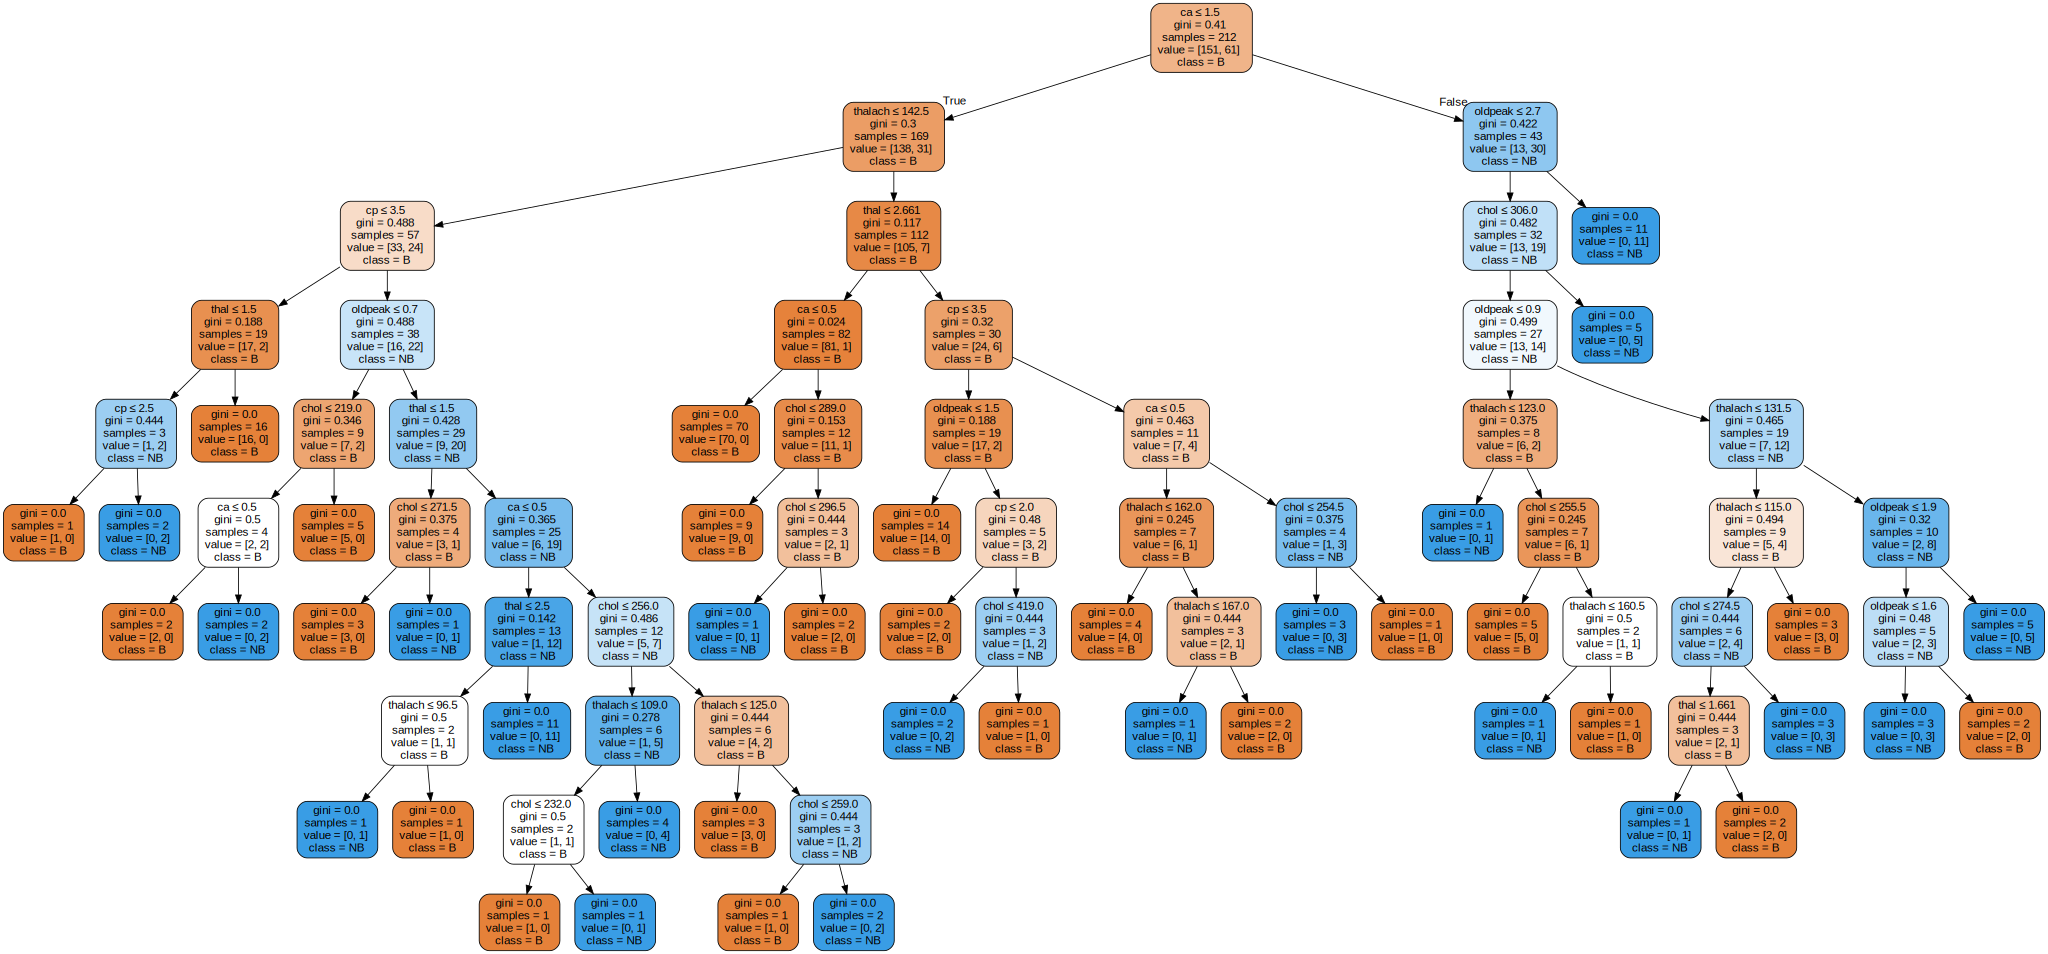

In [49]:
import graphviz
tree_data = tree.export_graphviz(ctree, out_file=None, 
                                 feature_names=x.columns, 
                                 class_names = ['B', 'NB'],
                                 filled=True,
                                 rounded=True, 
                                 special_characters=True
                                 )
graph = graphviz.Source(tree_data)
graph

# random forest 


# build the random forest model and check the accuracy

In [50]:
from sklearn import tree

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_tree=RandomForestClassifier(n_estimators=100)

In [52]:
rf_tree.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=22)

In [55]:
rf_tree.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
y_test_pred=rf_tree.predict(x_test)

In [57]:
from sklearn import metrics

In [58]:
metrics.accuracy_score(y_test,y_test_pred)

0.8021978021978022

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
rf_tree=RandomForestClassifier(n_estimators=100)
param_grid={'n_estimators':[100,500],
            'criterion'   :['gini','entropy'],
            'max_features' :[3,4,5],
            'max_depth'    :[16,22,34,45,56],
            'min_samples_leaf':[13,24],
           }

In [61]:
random_rf=RandomizedSearchCV(rf_tree,n_iter=10,param_distributions=param_grid,scoring="accuracy",verbose=2, cv=4)
random_rf.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] n_estimators=100, min_samples_leaf=13, max_features=3, max_depth=45, criterion=gini 
[CV]  n_estimators=100, min_samples_leaf=13, max_features=3, max_depth=45, criterion=gini, total=   0.0s
[CV] n_estimators=100, min_samples_leaf=13, max_features=3, max_depth=45, criterion=gini 
[CV]  n_estimators=100, min_samples_leaf=13, max_features=3, max_depth=45, criterion=gini, total=   0.0s
[CV] n_estimators=100, min_samples_leaf=13, max_features=3, max_depth=45, criterion=gini 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_leaf=13, max_features=3, max_depth=45, criterion=gini, total=   0.0s
[CV] n_estimators=100, min_samples_leaf=13, max_features=3, max_depth=45, criterion=gini 
[CV]  n_estimators=100, min_samples_leaf=13, max_features=3, max_depth=45, criterion=gini, total=   0.0s
[CV] n_estimators=500, min_samples_leaf=24, max_features=4, max_depth=16, criterion=gini 
[CV]  n_estimators=500, min_samples_leaf=24, max_features=4, max_depth=16, criterion=gini, total=   0.3s
[CV] n_estimators=500, min_samples_leaf=24, max_features=4, max_depth=16, criterion=gini 
[CV]  n_estimators=500, min_samples_leaf=24, max_features=4, max_depth=16, criterion=gini, total=   0.3s
[CV] n_estimators=500, min_samples_leaf=24, max_features=4, max_depth=16, criterion=gini 
[CV]  n_estimators=500, min_samples_leaf=24, max_features=4, max_depth=16, criterion=gini, total=   0.3s
[CV] n_estimators=500, min_samples_leaf=24, max_features=4, max_depth=16, criterion=gini 
[CV]  n_estimators=500, m

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   11.0s finished
C:\Users\bunny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [100, 500], 'criterion': ['gini', 'entropy'], 'max_features': [3, 4, 5], 'max_depth': [16, 22, 34, 45, 56], 'min_samples_leaf': [13, 24]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

In [62]:
#accuracy after tuning the model  with gridsearchcv we got this accuracy
random_final_model=random_rf.best_estimator_
y_pred=random_final_model.predict(x_test)
metrics.accuracy_score(y_pred, y_test)

0.8241758241758241

In [63]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,2.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,3.0,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,2.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,2.0,0


# save the file and dump 

In [64]:
import pickle

In [65]:
pickle.dump(final_model, open('hackathon_21_sept.pk', 'wb'))

# XGBooost model 

# built the model with xgboost and see the accuracy

In [66]:
from xgboost import XGBClassifier

In [67]:
xgb=XGBClassifier()

In [68]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [71]:
print(x_train.shape)
print(x_test.shape)

(242, 6)
(61, 6)


In [72]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [73]:
y_pred_test=xgb.predict(x_test)

In [74]:
from sklearn import metrics

In [75]:
metrics.accuracy_score(y_test, y_pred_test)

0.7704918032786885

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
#XGBoost parameters
param_grid= { "n_estimators"      : [1000],    
               "learning_rate"   : [0.1,0.001,0.2,0.3],             
               "nthread"       : [4,5,6,7,8,2],  
               "subsample" : [1.0],
               "max_depth"        : [6,8,9,5],
             "colsample_bytree"       :[0.5,0.8],
             "min_child_weight"  : [3,4],
             "reg_alpha"  : [0.03],
             "reg_lambda" : [1],
            }

In [78]:
optimized_tree = GridSearchCV(xgb, param_grid, scoring = 'accuracy', verbose=2, cv=5) 

In [79]:
#fit the model 
optimized_tree.fit(x_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.2, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.2, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.5, lea

[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.

[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.4s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.6s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.4s
[CV] colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_byt

[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=1000, nthread=5, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=4, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.0s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.3s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=9, min_child_weight=3, n_estimators=1000, nthread=2, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.1s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=9, min_child_weight=4, n_estimators=1000, nthread=8, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.5s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=1000, nthread=7, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0, total=   0.2s
[CV] colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=1000, nthread=6, reg_alpha=0.03, reg_lambda=1, subsample=1.0 
[CV]  colsample_bytree=0.8, lea

[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:  8.7min finished
C:\Users\bunny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1000], 'learning_rate': [0.1, 0.001, 0.2, 0.3], 'nthread': [4, 5, 6, 7, 8, 2], 'subsample': [1.0], 'max_depth': [6, 8, 9, 5], 'colsample_bytree': [0.5, 0.8], 'min_child_weight': [3, 4], 'reg_alpha': [0.03], 'reg_lambda': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [80]:
#best paramteres after tuning the model
optimized_tree.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.001,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 1000,
 'nthread': 4,
 'reg_alpha': 0.03,
 'reg_lambda': 1,
 'subsample': 1.0}

In [81]:
y_test_pred=optimized_tree.predict(x_test)

In [82]:
#best accuracy 
metrics.accuracy_score(y_test, y_test_pred)

0.7868852459016393